In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cars_clus.csv')#loading csv file into pandas dataframe
df.head()#first five rows
df.tail()#last five rows
len(df)#number of rows
df.columns#column names
df['model']#specific column
df[['model','sales']]#multiple columns
df[0:10]#slicing
df.shape#shape of the dataframe
df.size#number of items

2544

In [3]:
df[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length',
'curb_wgt','fuel_cap','mpg','lnsales']]=df[['sales','resale','type','price','engine_s','horsepow',
'wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric,errors='coerce')
df=df.dropna()
df=df.reset_index(drop=True)
df.size#size of the dataframe after dropping na values or cleaning data

1872

In [4]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [5]:
#feature set 
x=df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [6]:
#Normalization
from sklearn.preprocessing import MinMaxScaler#MinMaxScaler normalize data between 0 and 1
x=np.asarray(x)#return x as array
print(x[0:5])
min_max_scaler=MinMaxScaler()
feature_x=min_max_scaler.fit_transform(x)
print(feature_x[0:5])
print(feature_x.shape)

[[  1.8   140.    101.2    67.3   172.4     2.639  13.2    28.   ]
 [  3.2   225.    108.1    70.3   192.9     3.517  17.2    25.   ]
 [  3.5   210.    114.6    71.4   196.6     3.85   18.     22.   ]
 [  1.8   150.    102.6    68.2   178.      2.998  16.4    27.   ]
 [  2.8   200.    108.7    76.1   192.      3.561  18.5    22.   ]]
[[0.11428571 0.21518987 0.18655098 0.28143713 0.30625832 0.2310559
  0.13364055 0.43333333]
 [0.31428571 0.43037975 0.3362256  0.46107784 0.5792277  0.50372671
  0.31797235 0.33333333]
 [0.35714286 0.39240506 0.47722343 0.52694611 0.62849534 0.60714286
  0.35483871 0.23333333]
 [0.11428571 0.24050633 0.21691974 0.33532934 0.38082557 0.34254658
  0.28110599 0.4       ]
 [0.25714286 0.36708861 0.34924078 0.80838323 0.56724368 0.5173913
  0.37788018 0.23333333]]
(117, 8)


In [7]:
import scipy
leng=feature_x.shape[0]
d=scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        d[i,j]=scipy.spatial.distance.euclidean(feature_x[i],feature_x[j])   

c:\users\wel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import pylab
from scipy.cluster import hierarchy
z=hierarchy.linkage(d,'complete')

c:\users\wel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(z,max_d,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [10]:
clusters=fcluster(z,5,criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

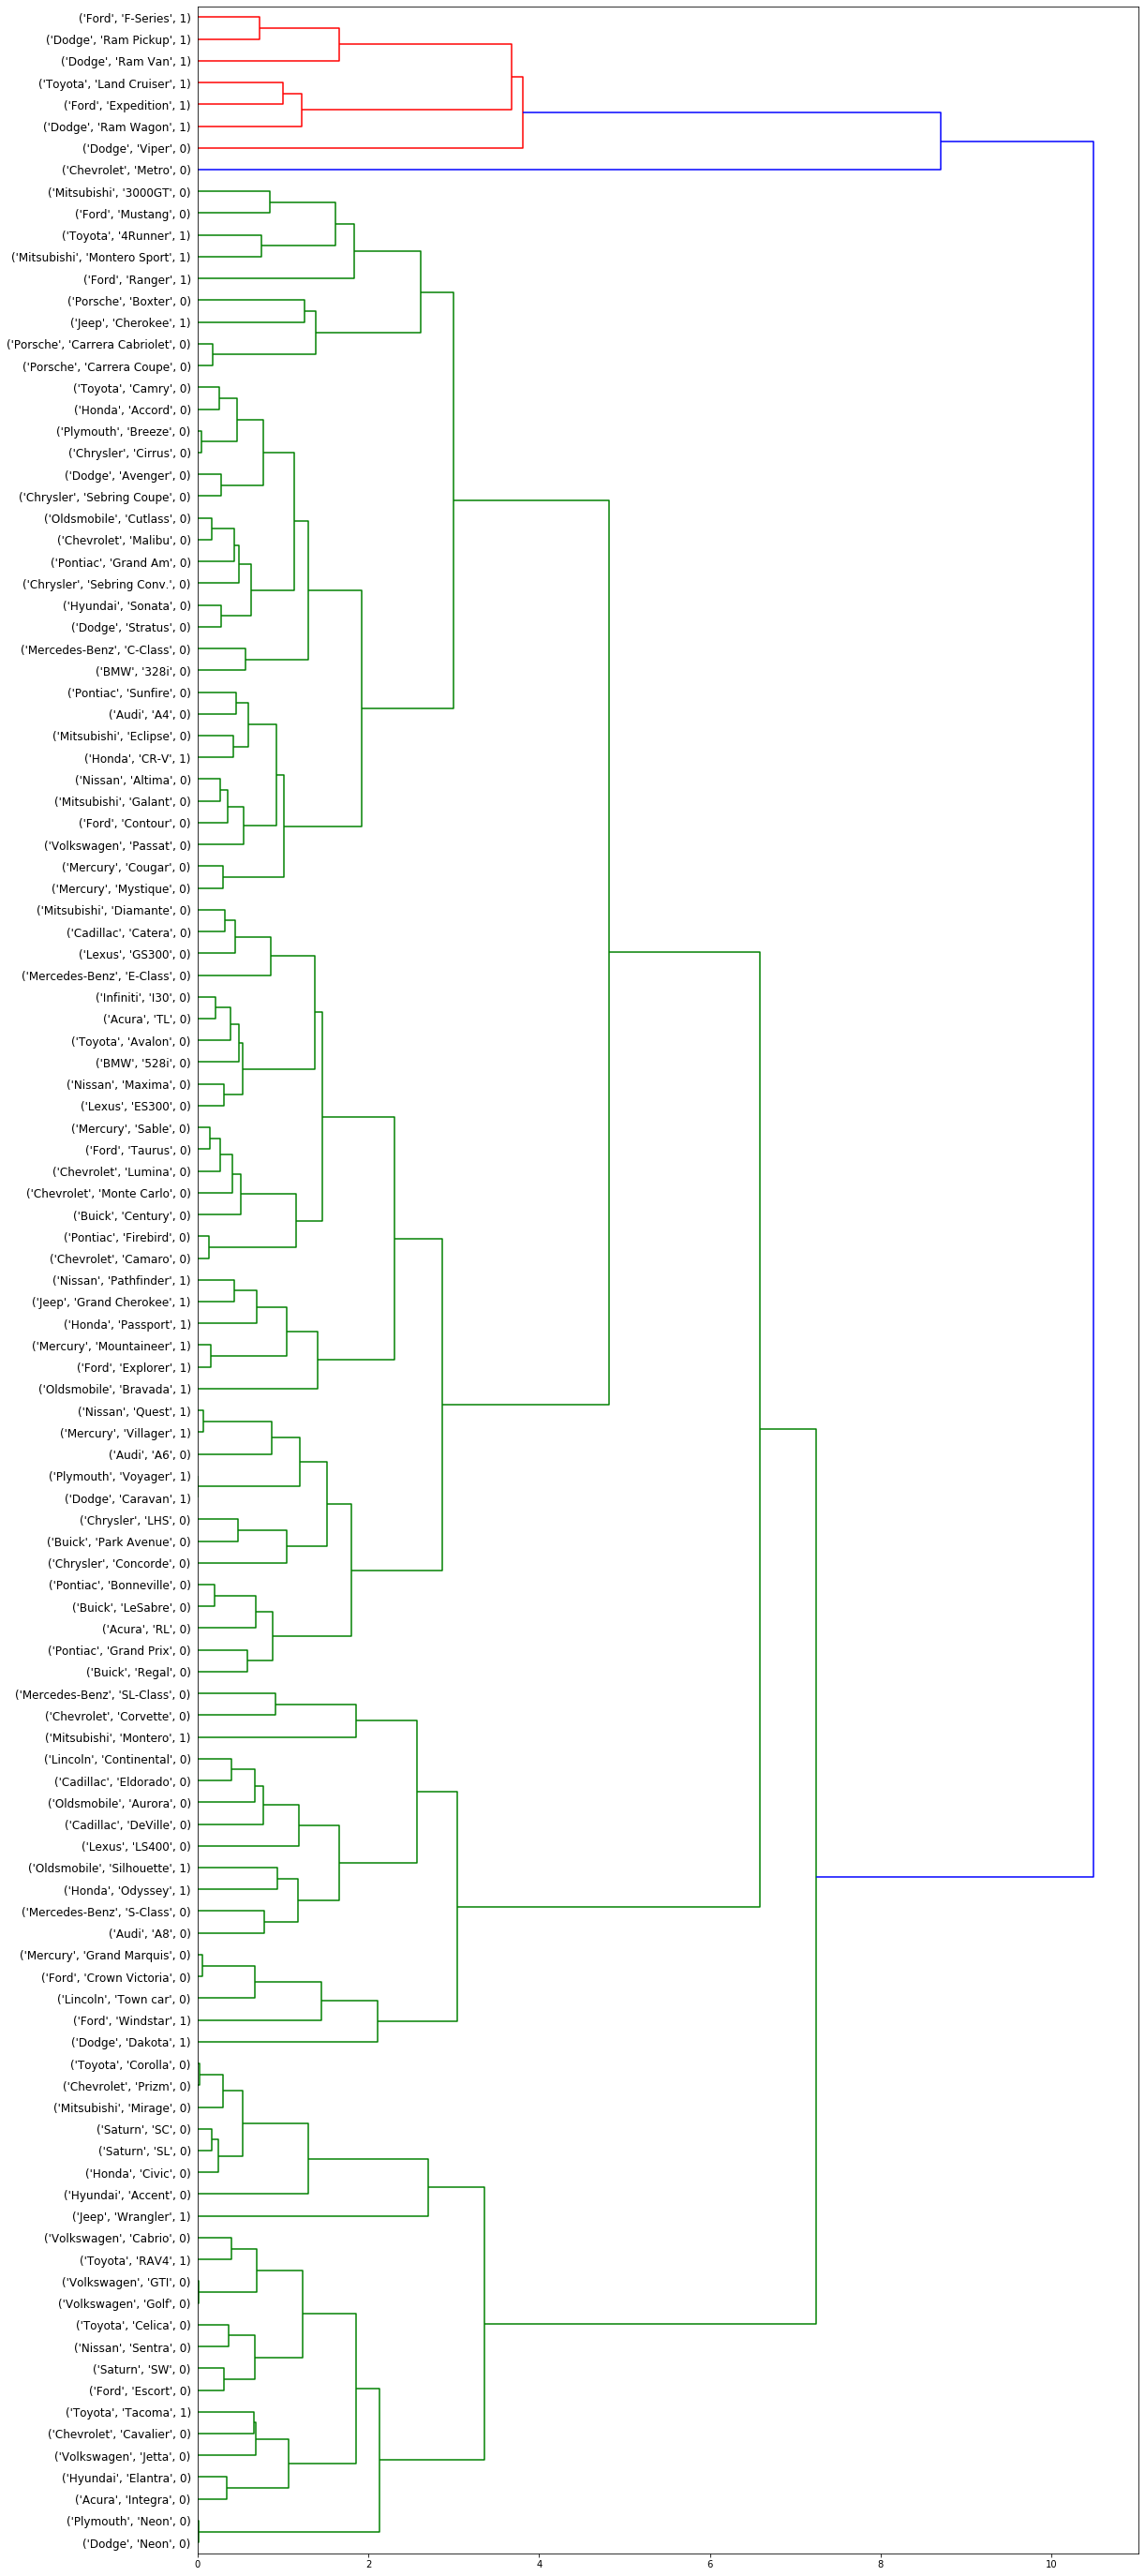

In [14]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
    return (df['manufact'][id],df['model'][id],int(float(df['type'][id])))
dendro=hierarchy.dendrogram(z,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

In [16]:
from scipy.spatial import distance_matrix
dist_matrix=distance_matrix(feature_x,feature_x)
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [19]:
from sklearn.cluster import AgglomerativeClustering
agglom=AgglomerativeClustering(n_clusters=6,linkage='complete')
agglom.fit(x)
agglom.labels_

array([2, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 3, 3, 3, 0, 1, 2,
       4, 3, 3, 0, 2, 0, 2, 3, 3, 5, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 3,
       0, 3, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 3,
       3, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 0, 0, 1, 1, 2, 3, 0, 3, 3, 3, 0,
       0, 0, 2, 2, 3, 3, 3, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 0, 2, 2, 3, 2, 2], dtype=int32)

In [20]:
df['cluster_']=agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

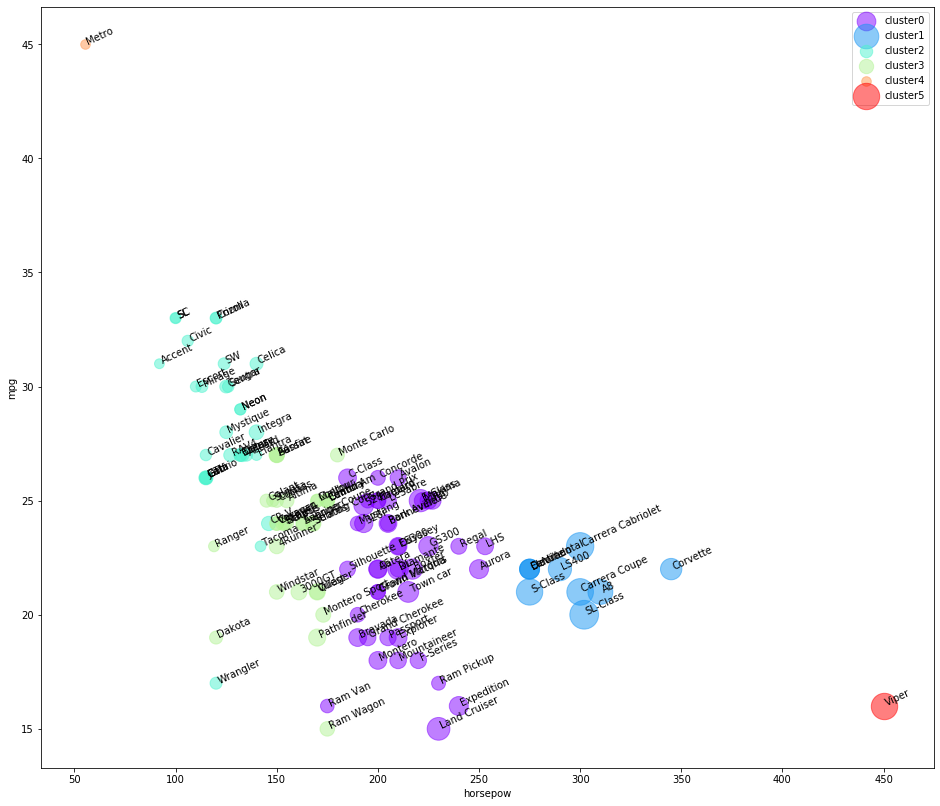

In [27]:
import matplotlib.cm as cm
n_clusters=max(agglom.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color,label in zip(colors,cluster_labels):
    subset=df[df.cluster_==label]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]),rotation=25)
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.show()

In [29]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     29
          1.0     14
1         0.0     10
2         0.0     26
          1.0      4
3         0.0     21
          1.0     11
4         0.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [35]:
agg_cars=df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

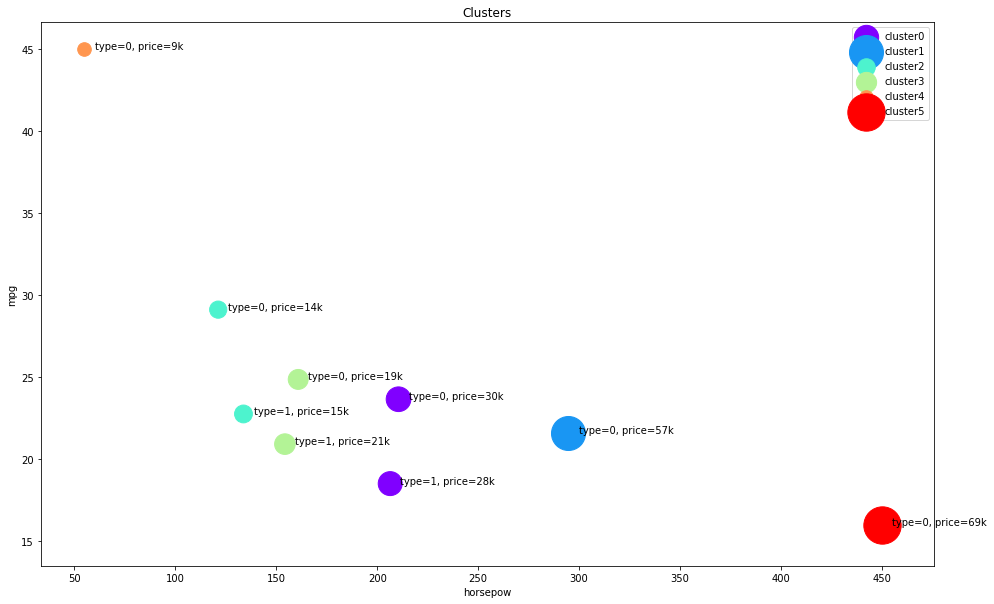

In [39]:
plt.figure(figsize=(16,10))
for color,label in zip(colors,cluster_labels):
    subset=agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))
plt.legend()
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.show()